Pattern Recognition 2020 - Ex 2a : SVM
===
Team chaussette

In [1]:
import numpy as np
import time
from sklearn import svm
from sklearn.model_selection import cross_val_score
from tqdm.notebook import tqdm

### Data loading

In [2]:
# SVM

#Loading csv data to numpy arrays
def load_data(file, labels=True):
    with open(file,"r") as csv:
        data = []
        for line in tqdm(csv):
            data.append(line.strip().split(","))
        data = np.asarray(data, dtype=np.int)
        if(labels):
            samples =  data[:,1:]
            labels = data[:,0]
            return samples, labels
        else:
            samples = data[:,:]
        return samples

In [3]:
train_file = 'data/mnist_train.csv'
X_train, y_train = load_data(train_file, labels=True)
print(f"Training set size : {len(X_train)}")


Training set size : 60000


In [4]:
test_file = 'data/mnist_test.csv'
X_test, y_test = load_data(test_file, labels=True)
print(f"Test set size : {len(X_test)}")


Test set size : 10000


### Grid Search

In [5]:
from sklearn.model_selection import GridSearchCV
# enable or disable grid search
test_grid_search = False

# we wanted to test more parameters but had to limit to those due to very long training time
parameters = {
    'kernel':['rbf', 'poly'], 
    'C':[1.0],
    'gamma':[1.0],
    'degree':[2],
}

if test_grid_search:
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters, n_jobs=4)
    
    print("Starting Grid search...")
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on training set using CV :")
    print(clf.best_params_)
    
"""
Starting Grid search...
Best parameters set found on training set using CV :
{'C': 1.0, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}
"""

"\nStarting Grid search...\nBest parameters set found on training set using CV :\n{'C': 1.0, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}\n"

### Training

In [9]:
from sklearn.metrics import plot_confusion_matrix
import time
clf = svm.SVC(kernel='poly', gamma=1.0, C = 1.0, degree=2, verbose=True)


print("Starting to train the classifier...")
start_time = time.time()
clf.fit(X_train, y_train)

print(f"Training done in {(time.time() - start_time)/60:.1f} minutes")

Starting to train the classifier...
[LibSVM]Training done in 3.8 minutes


### Evaluation

In [10]:
predictions = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print(f"Accuracy on the test set : {accuracy*100:.2f} %")

Accuracy on the test set : 98.06 %


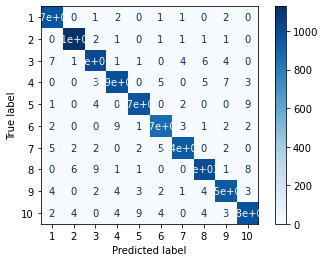

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

class_names = [str(i) for i in range(1, 11)]
disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

In [12]:
validation_file_name = "predictions.txt"
with open(validation_file_name, "w") as validation_file:
    for pred_id, prediction in enumerate(predictions):
        validation_file.write(f"{pred_id}, {prediction}\n")

unique, counts = np.unique(predictions, return_counts=True)
summary = dict(zip(unique, counts))
print(summary);

{0: 994, 1: 1141, 2: 1031, 3: 1009, 4: 983, 5: 890, 6: 952, 7: 1023, 8: 973, 9: 1004}
